# PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = r'C:\Users\iagzg\Desktop\D4FB\D4FB\EstructuraDirectorio\03_MACHINE_LEARNING\06-MACHINE LEARNING PROJECT FRAMEWORK\CASOS\04_BANK\\'

Nombres de los ficheros de datos.

In [3]:
nombre_df = 'df_tablon2.pickle'

Cargar los datos.

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

Se va a realizar una preselección de variables a través de dos métodos. 
- Método supervisado para saber que variables predictoras tienen poder explicativo en la target. 
- Método no supervisado (correlaciones) sobre las variables anteriormente seleccionadas en el supervisado. De manera que se pueda saber que variables tienen correlación entre sí y por tanto ensucian el modelo.

## MÉTODOS SUPERVISADOS

### Preparar x e y

In [5]:
target = 'y'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [6]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

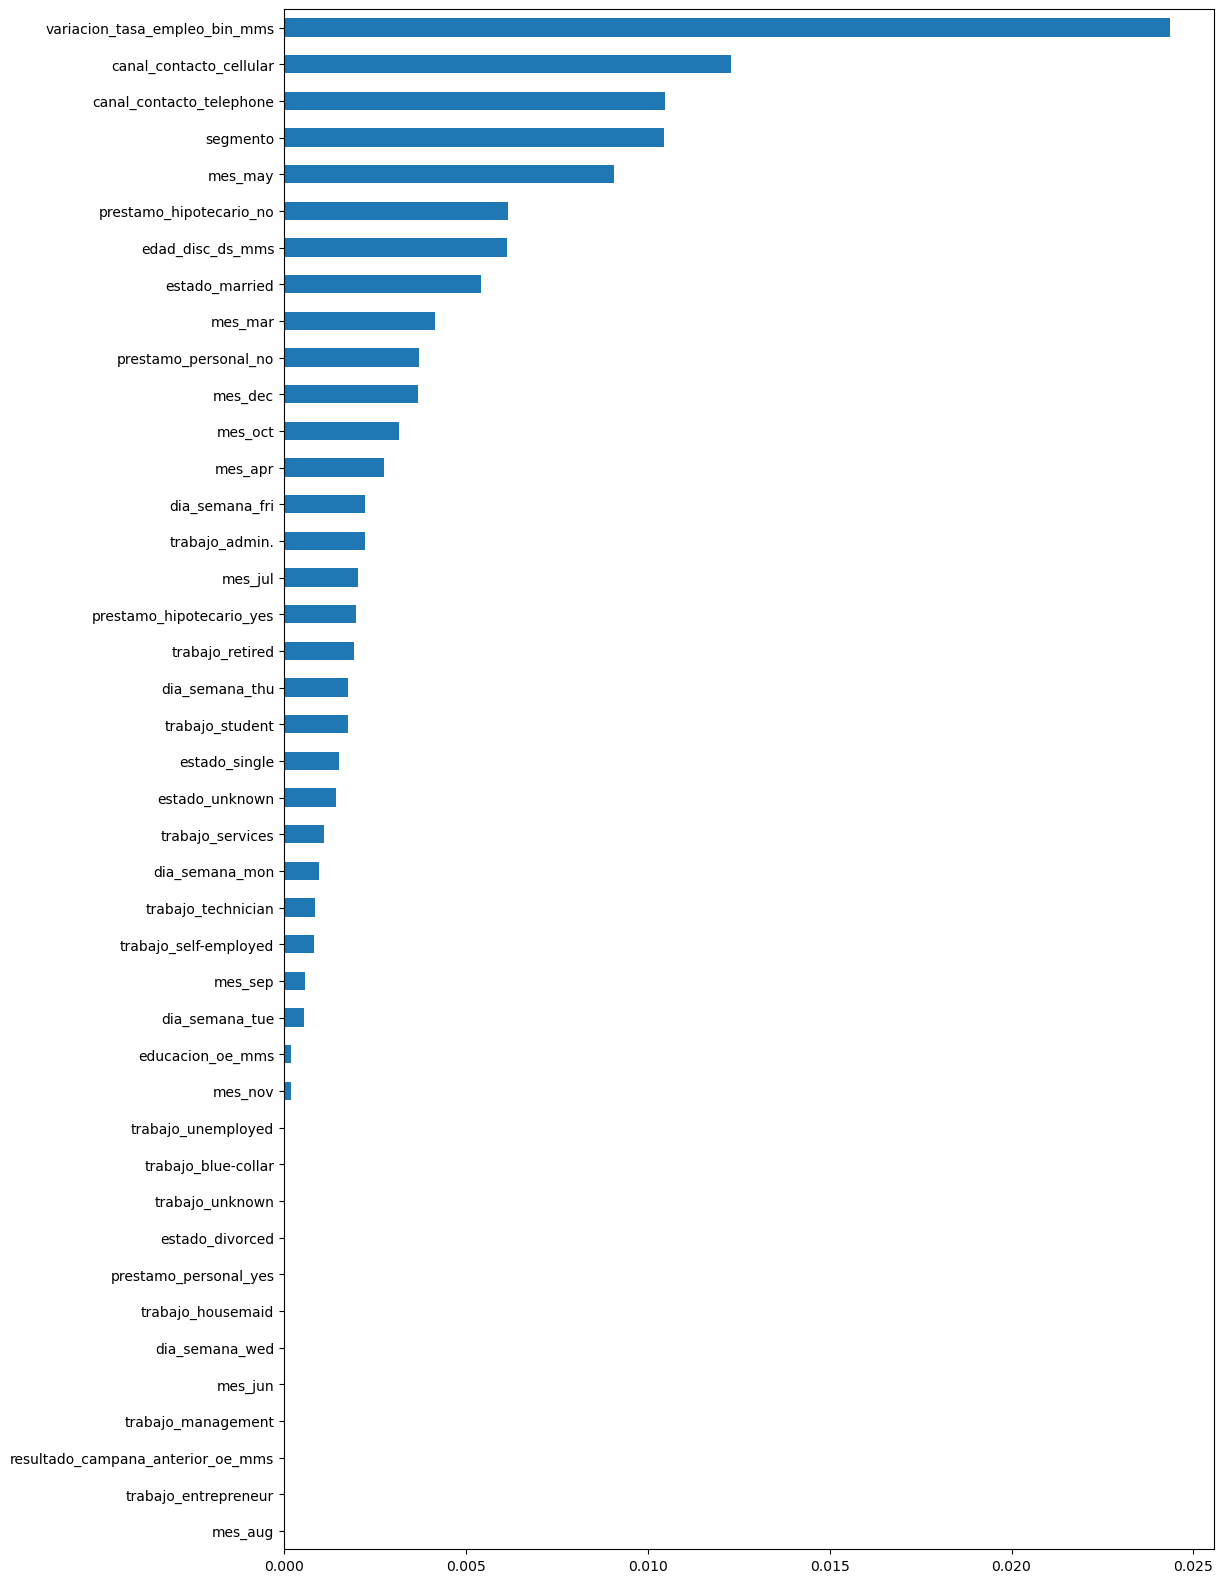

In [7]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [9]:
posicion_variable_limite = 20

##### Extraer los nombres de las que entran

In [10]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [11]:
x_mi = x[entran_mi].copy()

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [12]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [13]:
cor_finales = correlaciones_fuertes(x_mi)

##### Revisar agregado

In [14]:
cor_finales.var1.value_counts()

var1
variacion_tasa_empleo_bin_mms    2
canal_contacto_telephone         2
prestamo_hipotecario_no          1
segmento                         1
edad_disc_ds_mms                 1
canal_contacto_cellular          1
mes_may                          1
mes_apr                          1
Name: count, dtype: int64

In [15]:
cor_finales.var2.value_counts()

var2
variacion_tasa_empleo_bin_mms    2
mes_may                          2
mes_jul                          2
segmento                         1
prestamo_hipotecario_yes         1
canal_contacto_cellular          1
trabajo_retired                  1
Name: count, dtype: int64

##### Revisar detalle

In [16]:
cor_finales.head(50)

,var1,var2,corr
103,prestamo_hipotecario_no,segmento,0.787576
76,segmento,prestamo_hipotecario_yes,0.787576
1,variacion_tasa_empleo_bin_mms,canal_contacto_cellular,0.453594
40,canal_contacto_telephone,variacion_tasa_empleo_bin_mms,0.453594
137,edad_disc_ds_mms,trabajo_retired,0.373075
44,canal_contacto_telephone,mes_may,0.342967
24,canal_contacto_cellular,mes_may,0.342967
95,mes_may,mes_jul,0.335261
15,variacion_tasa_empleo_bin_mms,mes_jul,0.323741
240,mes_apr,variacion_tasa_empleo_bin_mms,0.322429


#### Filtrar variables

Meter en una lista las que queramos descartar por alta correlacion y eliminarlas.

La variable que más correlaciona es la que habíamos creado artificialmente para segmentar a los clientes. La quitamos de nuestro dataset a pesar de que sea una variable explicativa según el Mutual Information.

In [17]:
a_eliminar_corr = ['segmento']

In [18]:
x_mi.drop(columns = a_eliminar_corr, inplace = True)

In [31]:
x_preseleccionado = x_mi.copy()

In [32]:
sorted(x_preseleccionado.columns.to_list())

['canal_contacto_cellular',
 'canal_contacto_telephone',
 'dia_semana_fri',
 'dia_semana_thu',
 'edad_disc_ds_mms',
 'estado_married',
 'mes_apr',
 'mes_dec',
 'mes_jul',
 'mes_mar',
 'mes_may',
 'mes_oct',
 'prestamo_hipotecario_no',
 'prestamo_hipotecario_yes',
 'prestamo_personal_no',
 'trabajo_admin.',
 'trabajo_retired',
 'trabajo_student',
 'variacion_tasa_empleo_bin_mms']

## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [33]:
x_preseleccionado

,variacion_tasa_empleo_bin_mms,canal_contacto_cellular,canal_contacto_telephone,mes_may,prestamo_hipotecario_no,edad_disc_ds_mms,estado_married,mes_mar,prestamo_personal_no,mes_dec,mes_oct,mes_apr,dia_semana_fri,trabajo_admin.,mes_jul,prestamo_hipotecario_yes,trabajo_retired,dia_semana_thu,trabajo_student
0,1.0,0.0,1.0,1.0,1.0,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,1.0,0.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,1.0,1.0,0.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,1.0,0.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25621,0.0,1.0,0.0,0.0,1.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25622,0.0,1.0,0.0,0.0,0.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
25623,0.0,1.0,0.0,0.0,1.0,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25624,0.0,1.0,0.0,0.0,1.0,0.4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [35]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [36]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)